In [ ]:
pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("cat",200,"/drive/MyDrive/datasets")



[!!]Indexing page: 1

[%] Indexed 152 Images on Page 1.


[%] Downloading Image #1 from https://peopledotcom.files.wordpress.com/2018/02/two-tone-cat.jpg
[!] Issue getting: https://peopledotcom.files.wordpress.com/2018/02/two-tone-cat.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from http://www.reportingday.com/wp-content/uploads/2018/06/Cat-Sleeping-Pics.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static01.nyt.com/images/2019/09/04/business/04chinaclone-06/04chinaclone-06-superJ

In [ ]:
downloader.download("dog",200,"/drive/MyDrive/datasets")



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Australian_Catle_Dog_Silverbarn's_Paavo.jpg/1200px-Australian_Catle_Dog_Silverbarn's_Paavo.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://peopledotcom.files.wordpress.com/2018/05/dog-ducks-6.jpg
[!] Issue getting: https://peopledotcom.files.wordpress.com/2018/05/dog-ducks-6.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from https://img.thrfun.com/img/083/608/panting_dog_x1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://jooinn.com/images/dog-67.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images.hellogiggles.com/uploads/2017/02/04230309/happy-dog.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://animalcorner.org/wp-content/uploads/2020/07/Japanese-Dog-Breeds-Akita.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.sciencealert.com/ima

In [ ]:
!pip3 install  fastai --upgrade

     |████████████████████████████████| 194kB 4.2MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path("/content/drive/MyDrive/datasets")

In [ ]:
path.ls()

(#2) [Path('/content/drive/MyDrive/datasets/cat'),Path('/content/drive/MyDrive/datasets/dog')]

In [ ]:
data = DataBlock(blocks = (ImageBlock,CategoryBlock),get_items = get_image_files,splitter=RandomSplitter(valid_pct =0.2,seed  =32),get_y = parent_label,item_tfms=Resize(224))

In [ ]:
dls = data.dataloaders(path)

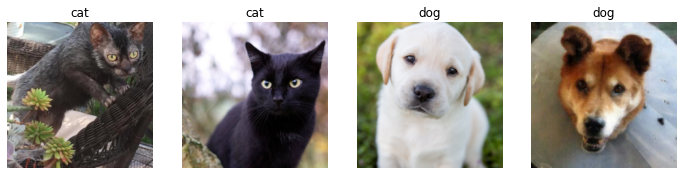

In [ ]:
dls.valid.show_batch(max_n = 4,nrows=1)

In [ ]:
learn = cnn_learner(dls,resnet50,metrics  =error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.790207,1.196015,0.150000,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.073136,0.533960,0.062500,00:18
1,0.079527,0.325394,0.062500,00:18
2,0.073764,0.145748,0.050000,00:17
3,0.081207,0.101860,0.050000,00:18
4,0.076663,0.083813,0.037500,00:18


In [ ]:
learn.save("stage-1")

Path('models/stage-1.pth')

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.015781,0.183585,0.062500,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.000855,0.299136,0.075000,00:18
1,0.008439,0.629265,0.100000,00:18
2,0.041269,0.509569,0.087500,00:18


In [ ]:
learn.load("stage-1")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

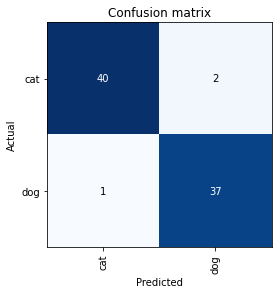

In [ ]:
interp.plot_confusion_matrix()

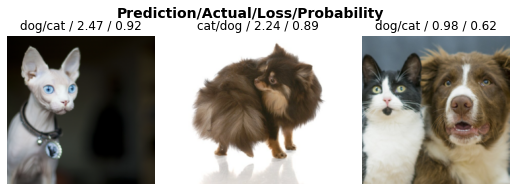

In [ ]:
interp.plot_top_losses(k  =3,nrows  =1)

In [ ]:
learn.export()

In [ ]:
path  =Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learner = load_learner(path/'export.pkl')

In [ ]:
learner.predict("/dog.jpg")

('dog', tensor(1), tensor([1.2846e-07, 1.0000e+00]))

In [ ]:
image = download_images(".","https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/dog_cool_summer_slideshow/1800x1200_dog_cool_summer_other.jpg?resize=750px:*")

AttributeError: ignored

In [ ]:
!mv "export.pkl" "/content/drive"

mv: cannot create regular file '/content/drive/export.pkl': Operation not supported


In [ ]:
learner.export("/content/drive/MyDrive/dog_cat.pkl")

In [ ]:
model = load_learner('/content/drive/MyDrive/dog_cat.pkl')

In [ ]:
model.dls.vocab

['cat', 'dog']

In [ ]:
upload_btn = widgets.FileUpload()
lbl_pred = widgets.Label()
output_pl = widgets.Output()
def on_click_classify(change):
  imag = PILImage.create(upload_btn.data[0])
  
  output_pl.clear_output()
  with output_pl:
    display(imag.to_thumb(128,128))
  pred,pred_id,probs = model.predict(imag)
  
  lbl_pred.value = f'prediction :{pred};probability:{probs[pred_id]}'
btn = widgets.Button(description="classify")
btn.on_click(on_click_classify)


In [ ]:
VBox([widgets.Label('select your dog'),upload_btn,btn,output_pl,lbl_pred])

Traceback (most recent call last):
  File "/usr/local/bin/voila", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 663, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.6/dist-packages/voila/app.py", line 362, in initialize
    raise ValueError('argument is neither a file nor a directory: %r' % arg)
ValueError: argument is neither a file nor a directory: './dog.ipynb'
